In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [70]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [71]:
data['percentage'] = data['percentage'].str.replace(',', '').str.replace('%', '').astype(float)
data['value'] = data['value'].str.replace(',', '').str.replace('.', '', regex=False)
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [72]:
data = data[["year", "value"]].copy()
data

,year,value
0,2010,3.500000e+02
1,2010,7.900000e+11
2,2010,3.000000e+00
3,2010,7.000000e+00
4,2010,6.200000e+01
...,...,...
12649,2035,5.500000e+01
12650,2035,3.100000e+01
12651,2035,9.400000e+06
12652,2035,1.500000e+07


In [73]:
data = data.groupby('year').sum()

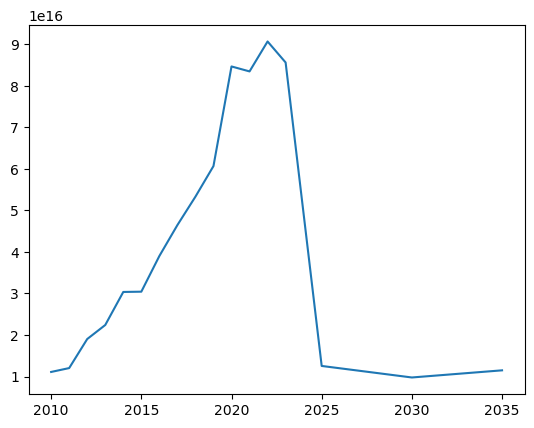

In [74]:
plt.plot(data)
plt.show()

In [75]:
X_train, X_test = train_test_split(data, test_size=0.2, shuffle=False)

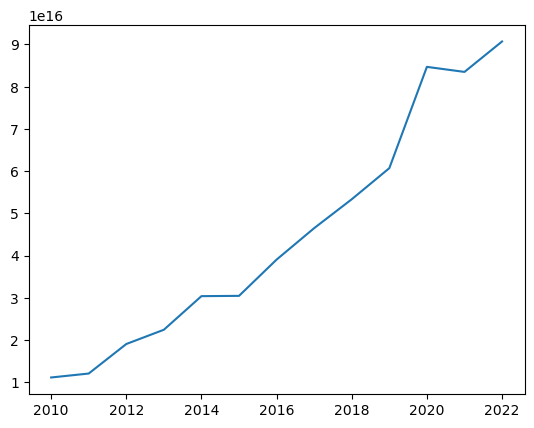

In [76]:
plt.plot(X_train)
plt.show()

In [77]:
adfuller(X_train)

(1.6290527382664843,
 0.997942171461146,
 4,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 602.8168932357939)

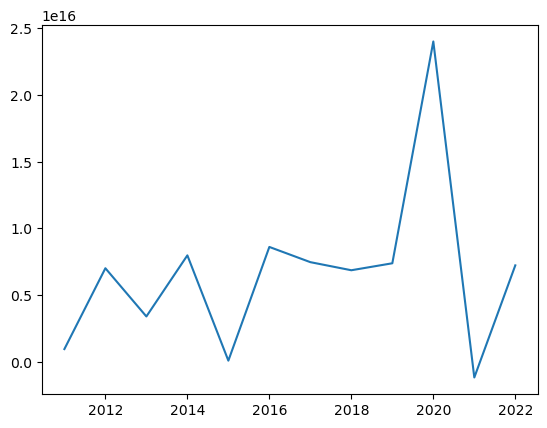

(0.49658855399990803,
 0.9847690384926533,
 4,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 530.8946454624543)

In [78]:
X_train_diff_1 = X_train.diff().dropna()
plt.plot(X_train_diff_1)
plt.show()
adfuller(X_train_diff_1)

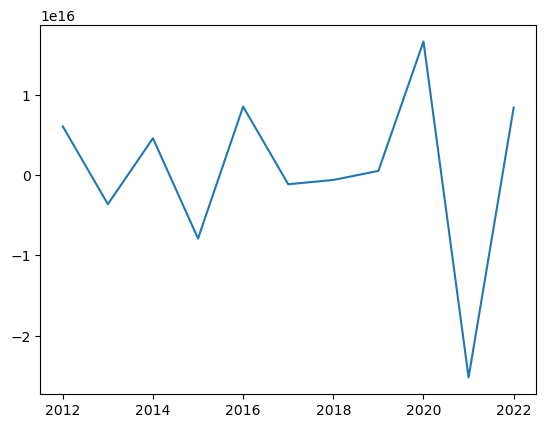

(-0.15728467375598082,
 0.9434253203179971,
 3,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 529.7085415322363)

In [79]:
X_train_diff_2 = X_train_diff_1.diff().dropna()
plt.plot(X_train_diff_2)
plt.show()
adfuller(X_train_diff_2)

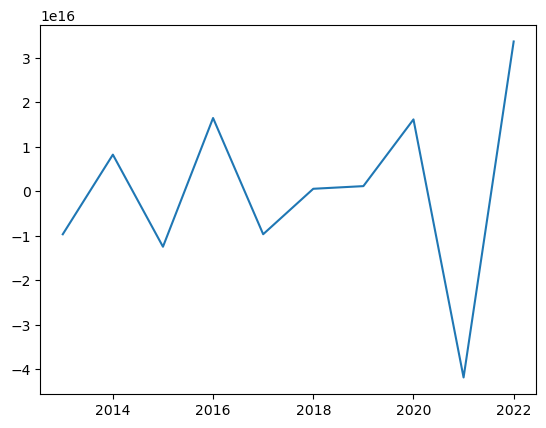

(-8.71628554950753,
 3.481250155290183e-14,
 2,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 453.5417794782502)

In [80]:
X_train_diff_3 = X_train_diff_2.diff().dropna()
plt.plot(X_train_diff_3)
plt.show()
adfuller(X_train_diff_3)

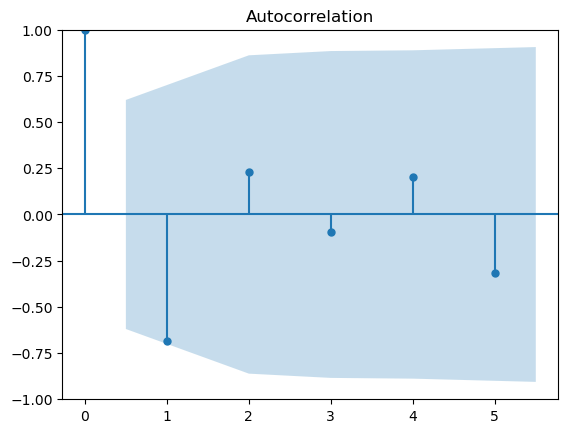

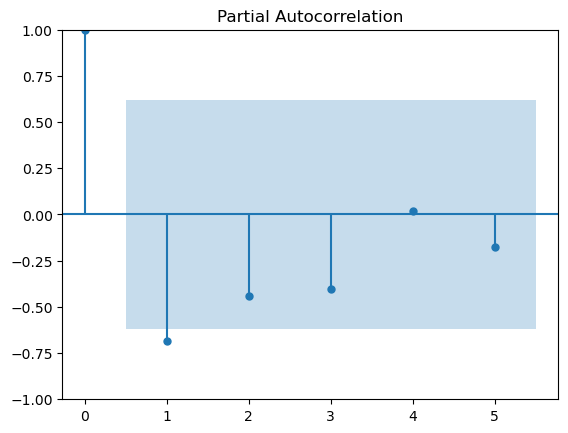

In [81]:
plot_acf(X_train_diff_3)
plot_pacf(X_train_diff_3)
plt.show()

In [82]:
model_fit = ARIMA(X_train, order=(2, 3, 4)).fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   13
Model:                 ARIMA(2, 3, 4)   Log Likelihood                -383.575
Date:                Mon, 02 Dec 2024   AIC                            781.150
Time:                        10:33:05   BIC                            783.268
Sample:                             0   HQIC                           778.826
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8783      8.262     -0.106      0.915     -17.071      15.315
ar.L2         -0.9999      6.341     -0.158      0.875     -13.428      11.428
ma.L1         -1.1207     10.328     -0.109      0.9

c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


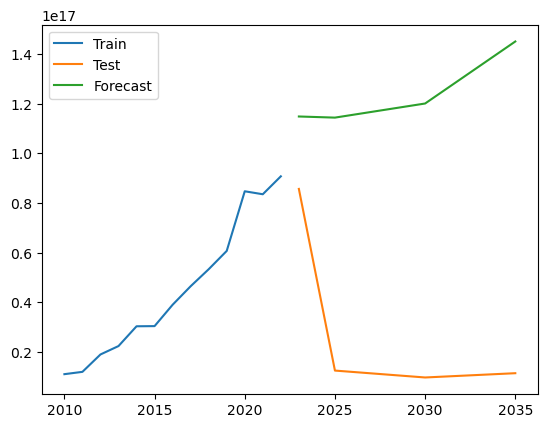

In [83]:
forecast = model_fit.forecast(steps=len(X_test))
plt.plot(X_train.index, X_train, label='Train')
plt.plot(X_test.index, X_test, label='Test')
plt.plot(X_test.index, forecast, label='Forecast')
plt.legend()
plt.show()